<a href="https://colab.research.google.com/github/ZUYNOUZAMAKI/Image-based-Animal-Classifier/blob/main/SIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CATTLECV.zip to CATTLECV.zip


In [2]:
from google.colab import files
uploaded = files.upload()

Saving BUFFALOCV.zip to BUFFALOCV.zip


In [3]:
!unzip "CATTLECV.zip" -d CATTLE

Archive:  CATTLECV.zip
  inflating: CATTLE/README.dataset.txt  
  inflating: CATTLE/README.roboflow.txt  
   creating: CATTLE/test/
 extracting: CATTLE/test/00000017_jpg.rf.50660f0e0f0206c265a6d7cdf1a66375.jpg  
 extracting: CATTLE/test/00000018_jpg.rf.2be22d97c0739b356d3c17a4b0dc3a36.jpg  
 extracting: CATTLE/test/00000039_jpg.rf.f29c1ca19e1246659ab615a1fa26f330.jpg  
 extracting: CATTLE/test/00000053_jpg.rf.45531f659f94fe4da270072ed17ae6db.jpg  
 extracting: CATTLE/test/00000056_jpg.rf.1ef6adeec69e1fb93174fbd75d89b91a.jpg  
 extracting: CATTLE/test/00000057_jpg.rf.7bb89640c49c2fc995b87768a1a6dd01.jpg  
 extracting: CATTLE/test/00000077_jpg.rf.7b18b9ed1a4cfb070493da5aa767e400.jpg  
 extracting: CATTLE/test/00000078_jpg.rf.ba79fb372b6a166977fe1b7e73b0b13e.jpg  
 extracting: CATTLE/test/00000079_jpg.rf.56dd489b1fca1cb7f2feb79f8f2e5cf6.jpg  
 extracting: CATTLE/test/00000085_jpg.rf.6cfab4b7338ea6d0a07418125510e18c.jpg  
 extracting: CATTLE/test/00000105_jpg.rf.40c96571f8e452328de7474e36e

In [4]:
!unzip "BUFFALOCV.zip" -d BUFFALO




Archive:  BUFFALOCV.zip
  inflating: BUFFALO/README.dataset.txt  
  inflating: BUFFALO/README.roboflow.txt  
   creating: BUFFALO/train/
 extracting: BUFFALO/train/001_jpg.rf.29fd697275dab18e3b57b53969346fa4.jpg  
 extracting: BUFFALO/train/001_jpg.rf.3043a076ae0a2417d988a833264eb410.jpg  
 extracting: BUFFALO/train/001_jpg.rf.b44adce031bf7ed24103cacf0c2e1f83.jpg  
 extracting: BUFFALO/train/002_jpg.rf.5366c0fd161f5d4df17cb509012206cf.jpg  
 extracting: BUFFALO/train/002_jpg.rf.d255890a0cbb26d534a08a572914ff9f.jpg  
 extracting: BUFFALO/train/002_jpg.rf.efa2d26352ab0f0e81e09366891bf1f8.jpg  
 extracting: BUFFALO/train/003_jpg.rf.4936069f4174177495300257c7db90e5.jpg  
 extracting: BUFFALO/train/003_jpg.rf.90df5d5d718d53a8eeddbdcb0e5107f0.jpg  
 extracting: BUFFALO/train/003_jpg.rf.ef0068396fd3cc2b3c6f3de6575fc5ab.jpg  
 extracting: BUFFALO/train/004_jpg.rf.5a4ffda84d781cc273588f52acc72f2b.jpg  
 extracting: BUFFALO/train/004_jpg.rf.bfb527e800a7e3d37f0c05f3d86889d0.jpg  
 extracting: BUF

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00


In [6]:
!pip install ultralytics --upgrade
!pip install timm

In [7]:
import os, glob, shutil

datasets = ["/content/CATTLE", "/content/BUFFALO"]

for ds in datasets:
    for split in ["train", "valid"]:
        # Ensure images/labels folders exist
        os.makedirs(os.path.join(ds, split, "images"), exist_ok=True)
        os.makedirs(os.path.join(ds, split, "labels"), exist_ok=True)

        # Move images (*.jpg, *.png) into images/
        for ext in ["*.jpg", "*.jpeg", "*.png"]:
            for img_file in glob.glob(os.path.join(ds, split, ext)):
                shutil.move(img_file, os.path.join(ds, split, "images"))

        # Move labels (*.txt) into labels/
        for txt_file in glob.glob(os.path.join(ds, split, "*.txt")):
            shutil.move(txt_file, os.path.join(ds, split, "labels"))


**Merging BUFFALO & CATTLE** into a single folder

In [8]:
import os
import shutil
import yaml

# Paths to your datasets
cattle_path = "/content/CATTLE"
buffalo_path = "/content/BUFFALO"
combined_path = "/content/CattleBuffaloCV"

# Subfolders
splits = ["train", "val"]
subdirs = ["images", "labels"]

# Create combined dataset folder
for split in splits:
    for sub in subdirs:
        os.makedirs(os.path.join(combined_path, split, sub), exist_ok=True)

# Function to copy files
def copy_files(src, dst):
    if os.path.exists(src):
        for file in os.listdir(src):
            src_file = os.path.join(src, file)
            dst_file = os.path.join(dst, file)
            if os.path.isfile(src_file):
                # Avoid overwrite by renaming duplicates
                if os.path.exists(dst_file):
                    base, ext = os.path.splitext(file)
                    count = 1
                    while os.path.exists(dst_file):
                        dst_file = os.path.join(dst, f"{base}_{count}{ext}")
                        count += 1
                shutil.copy2(src_file, dst_file)

# Merge YOLO and Buffalo datasets
for split in splits:
    for sub in subdirs:
        copy_files(os.path.join(cattle_path, split, sub),
                   os.path.join(combined_path, split, sub))
        copy_files(os.path.join(buffalo_path, split, sub),
                   os.path.join(combined_path, split, sub))

print("✅ Datasets merged into:", combined_path)

# =========================
# Create data.yaml
# =========================
data_yaml = {
    "path": combined_path,
    "train": "train/images",
    "val": "val/images",
    "nc": 2,
    "names": ["cattle", "buffalo"]
}

yaml_path = os.path.join(combined_path, "data.yaml")
with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f)

print("✅ data.yaml created at:", yaml_path)


✅ Datasets merged into: /content/CattleBuffaloCV
✅ data.yaml created at: /content/CattleBuffaloCV/data.yaml


In [9]:
import yaml

# Absolute paths
data_yaml = {
    "path": "/content/CattleBuffaloCV",
    "train": "/content/CattleBuffaloCV/train/images",
    "val": "/content/CattleBuffaloCV/val/images",
    "nc": 2,
    "names": ["cattle", "buffalo"]
}

# Save to data.yaml
yaml_path = "/content/CattleBuffaloCV/data.yaml"
with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print(f"data.yaml created/updated at {yaml_path}")


data.yaml created/updated at /content/CattleBuffaloCV/data.yaml


Conversion to **YOLO Labels**

In [10]:
# ==============================
# Convert COCO JSON -> YOLO Labels
# ==============================

import json
import os
from tqdm import tqdm

def coco_to_yolo(coco_json_path, output_dir, classes=None):
    with open(coco_json_path, 'r') as f:
        coco = json.load(f)

    # Class list
    if classes is None:
        classes = [c['name'] for c in coco['categories']]

    # Map category_id to index
    category_map = {c['id']: i for i, c in enumerate(coco['categories'])}

    # Ensure output folder exists
    os.makedirs(output_dir, exist_ok=True)

    # Make label files
    for img in tqdm(coco['images'], desc="Converting"):
        img_id = img['id']
        file_name = os.path.splitext(img['file_name'])[0]
        label_path = os.path.join(output_dir, f"{file_name}.txt")

        # Get annotations for this image
        anns = [a for a in coco['annotations'] if a['image_id'] == img_id]

        with open(label_path, "w") as f_out:
            for ann in anns:
                cat_id = ann['category_id']
                cls = category_map[cat_id]

                # COCO bbox: [x_min, y_min, width, height]
                x, y, w, h = ann['bbox']

                # Normalize to YOLO: [x_center, y_center, width, height]
                x_center = (x + w/2) / img['width']
                y_center = (y + h/2) / img['height']
                w /= img['width']
                h /= img['height']

                f_out.write(f"{cls} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

    print(f"✅ Converted {len(coco['images'])} images into YOLO labels")
    return classes


Fixed **COCO** to **YOLO** Converter

In [11]:
# ==============================
# Fixed COCO → YOLO Converter
# ==============================

import json
import os
from tqdm import tqdm

def coco_to_yolo(coco_json_path, output_dir):
    """
    Converts COCO JSON annotations to YOLO format.

    Args:
        coco_json_path (str): Path to COCO JSON annotation file.
        output_dir (str): Folder where YOLO label files will be saved.

    Returns:
        classes (list): List of class names.
    """

    # --- Load COCO JSON ---
    with open(coco_json_path, 'r') as f:
        coco = json.load(f)

    # --- Get class list ---
    classes = [c['name'] for c in coco['categories']]
    # Map category_id to YOLO class index
    category_map = {c['id']: i for i, c in enumerate(coco['categories'])}

    # --- Prepare output folder ---
    os.makedirs(output_dir, exist_ok=True)

    # --- Convert each image ---
    for img in tqdm(coco['images'], desc=f"Converting {os.path.basename(output_dir)}"):
        img_id = img['id']
        file_name = os.path.splitext(img['file_name'])[0]
        label_path = os.path.join(output_dir, f"{file_name}.txt")

        # Get annotations for this image
        anns = [a for a in coco['annotations'] if a['image_id'] == img_id]

        if len(anns) == 0:
            # Skip images with no annotations
            continue

        # Write YOLO labels
        with open(label_path, "w") as f_out:
            for ann in anns:
                cls = category_map[ann['category_id']]
                x, y, w, h = ann['bbox']
                # Normalize to YOLO format
                x_center = (x + w/2) / img['width']
                y_center = (y + h/2) / img['height']
                w /= img['width']
                h /= img['height']
                f_out.write(f"{cls} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

    print(f"✅ Conversion complete! Labels saved to: {output_dir}")
    print(f"Classes: {classes}")
    return classes

# ==============================
# Example usage for train & val
# ==============================
splits = ["train", "valid"]
datasets = {
    "CATTLE": "/content/CATTLE",
    "BUFFALO": "/content/BUFFALO"
}

for dataset_name, dataset_path in datasets.items():
    print(f"\nProcessing {dataset_name} dataset...")

    for split in splits:
        # Update the JSON file name here
        json_path = os.path.join(dataset_path, split, "_annotations.coco.json")
        output_dir = os.path.join(dataset_path, split, "labels")

        print(f"Converting {split} split...")
        coco_to_yolo(json_path, output_dir)




Processing CATTLE dataset...
Converting train split...


Converting labels: 100%|██████████| 438/438 [00:00<00:00, 12832.62it/s]


✅ Conversion complete! Labels saved to: /content/CATTLE/train/labels
Classes: ['cows', 'cows']
Converting valid split...


Converting labels: 100%|██████████| 41/41 [00:00<00:00, 11241.84it/s]


✅ Conversion complete! Labels saved to: /content/CATTLE/valid/labels
Classes: ['cows', 'cows']

Processing BUFFALO dataset...
Converting train split...


Converting labels: 100%|██████████| 480/480 [00:00<00:00, 13235.68it/s]


✅ Conversion complete! Labels saved to: /content/BUFFALO/train/labels
Classes: ['buffalo', 'buffalo']
Converting valid split...


Converting labels: 100%|██████████| 40/40 [00:00<00:00, 11763.58it/s]

✅ Conversion complete! Labels saved to: /content/BUFFALO/valid/labels
Classes: ['buffalo', 'buffalo']


**Merge Function**

In [12]:
import os
import shutil
from glob import glob

def merge_datasets(src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    os.makedirs(dst_img_dir, exist_ok=True)
    os.makedirs(dst_lbl_dir, exist_ok=True)

    # copy images
    for img in glob(os.path.join(src_img_dir, "*.jpg")) + glob(os.path.join(src_img_dir, "*.png")):
        shutil.copy(img, dst_img_dir)

    # copy labels
    for lbl in glob(os.path.join(src_lbl_dir, "*.txt")):
        shutil.copy(lbl, dst_lbl_dir)

print("✅ Merge function ready")


✅ Merge function ready


Fixing the **Labels** Accurately **(Train & Valid)**

In [14]:
import os

def update_labels(label_dir, class_id):
    updated = 0
    if not os.path.exists(label_dir):
        return updated
    for lbl_file in os.listdir(label_dir):
        if lbl_file.endswith(".txt"):
            path = os.path.join(label_dir, lbl_file)
            with open(path, "r") as f:
                lines = f.readlines()
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:
                    parts[0] = str(class_id)  # overwrite class id
                    new_lines.append(" ".join(parts) + "\n")
            with open(path, "w") as f:
                f.writelines(new_lines)
            updated += 1
    return updated

# Apply to both train and val
cattle_train_labels = "/content/CATTLE/train/labels"
cattle_valid_labels   = "/content/CATTLE/valid/labels"
buffalo_train_labels = "/content/BUFFALO/train/labels"
buffalo_valid_labels   = "/content/BUFFALO/valid/labels"

cattle_train_updated = update_labels(cattle_train_labels, 0)
cattle_valid_updated   = update_labels(cattle_valid_labels, 0)
buffalo_train_updated = update_labels(buffalo_train_labels, 1)
buffalo_valid_updated   = update_labels(buffalo_valid_labels, 1)

print(f"✅ Updated {cattle_train_updated} cattle train labels to class 0")
print(f"✅ Updated {cattle_valid_updated} cattle valid labels to class 0")
print(f"✅ Updated {buffalo_train_updated} buffalo train labels to class 1")
print(f"✅ Updated {buffalo_valid_updated} buffalo valid labels to class 1")


✅ Updated 438 cattle train labels to class 0
✅ Updated 41 cattle valid labels to class 0
✅ Updated 480 buffalo train labels to class 1
✅ Updated 40 buffalo valid labels to class 1


**Validation SPLIT**

In [15]:
import os, glob, shutil, random
import yaml

# -----------------------------
# CONFIG
# -----------------------------
dataset_root = "/content/CattleBuffaloCV"

# Original datasets
original_datasets = {
    "cattle": {
        "images": "/content/CATTLE/train/images",
        "labels": "/content/CATTLE/train/labels"
    },
    "buffalo": {
        "images": "/content/BUFFALO/train/images",
        "labels": "/content/BUFFALO/train/labels"
    }
}

val_fraction = 0.15  # Fraction of images to move to val

# -----------------------------
# CREATE YOLO-FRIENDLY FOLDERS
# -----------------------------
for split in ["train", "val"]:
    os.makedirs(os.path.join(dataset_root, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_root, split, "labels"), exist_ok=True)

# -----------------------------
# MERGE ALL TRAIN IMAGES AND LABELS
# -----------------------------
for dataset in original_datasets.values():
    # Copy images
    for img_file in glob.glob(os.path.join(dataset["images"], "*")):
        shutil.copy(img_file, os.path.join(dataset_root, "train/images", os.path.basename(img_file)))
    # Copy labels
    for lbl_file in glob.glob(os.path.join(dataset["labels"], "*.txt")):
        shutil.copy(lbl_file, os.path.join(dataset_root, "train/labels", os.path.basename(lbl_file)))

# -----------------------------
# SPLIT TRAIN / VAL
# -----------------------------
image_extensions = ["*.jpg", "*.jpeg", "*.png", "*.JPG", "*.JPEG", "*.PNG"]
train_images = []
for ext in image_extensions:
    train_images.extend(glob.glob(os.path.join(dataset_root, "train/images", ext)))

random.shuffle(train_images)
num_val = int(len(train_images) * val_fraction)
val_images = train_images[:num_val]

for img_path in val_images:
    img_name = os.path.basename(img_path)
    base_name = os.path.splitext(img_name)[0]

    # Move image to val
    shutil.move(img_path, os.path.join(dataset_root, "val/images", img_name))

    # Move corresponding label to val
    label_path = os.path.join(dataset_root, "train/labels", base_name + ".txt")
    if os.path.exists(label_path):
        shutil.move(label_path, os.path.join(dataset_root, "val/labels", base_name + ".txt"))

# -----------------------------
# CLEANUP: ensure each image has a label
# -----------------------------
for split in ["train", "val"]:
    img_folder = os.path.join(dataset_root, split, "images")
    lbl_folder = os.path.join(dataset_root, split, "labels")

    img_names = set(os.path.splitext(os.path.basename(f))[0] for f in glob.glob(os.path.join(img_folder, "*")))
    lbl_names = set(os.path.splitext(os.path.basename(f))[0] for f in glob.glob(os.path.join(lbl_folder, "*.txt")))

    # Remove labels without images
    for lbl_file in glob.glob(os.path.join(lbl_folder, "*.txt")):
        if os.path.splitext(os.path.basename(lbl_file))[0] not in img_names:
            os.remove(lbl_file)

    # Remove images without labels
    for img_file in glob.glob(os.path.join(img_folder, "*")):
        if os.path.splitext(os.path.basename(img_file))[0] not in lbl_names:
            os.remove(img_file)


# -----------------------------
# FINAL COUNTS
# -----------------------------
for split in ["train", "val"]:
    img_folder = os.path.join(dataset_root, split, "images")
    lbl_folder = os.path.join(dataset_root, split, "labels")
    print(f"{split} images: {len(os.listdir(img_folder))}")
    print(f"{split} labels: {len(os.listdir(lbl_folder))}")

print("✅ Cattle + Buffalo dataset populated, split, and YOLO-ready!")



train images: 781
train labels: 781
val images: 137
val labels: 137
✅ Cattle + Buffalo dataset populated, split, and YOLO-ready!


**YOLOv8** Detection + Crop **ROIs**

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
train images: 781
train labels: 781
val images: 137
val labels: 137
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/CattleBuffaloCV/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, 

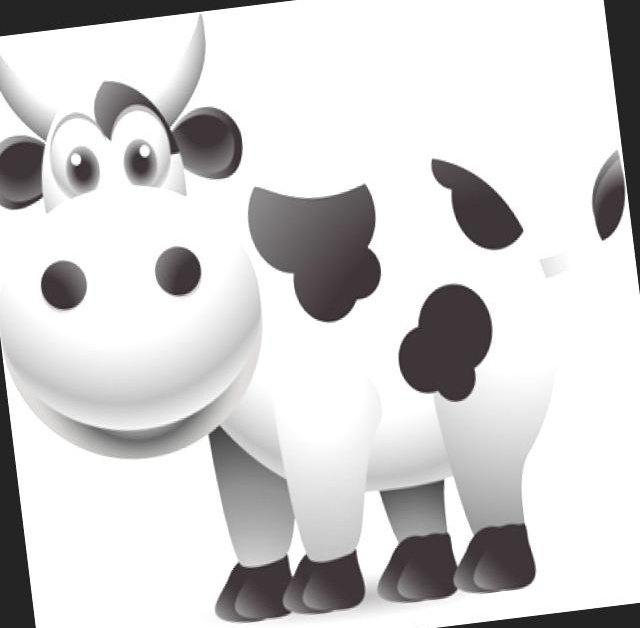

In [16]:
# ==============================
# YOLOv8 Full Pipeline: Merge, Train & Crop
# ==============================

# 1️⃣ Install & import
!pip install ultralytics --quiet

from ultralytics import YOLO
import os, glob, shutil
from IPython.display import Image, display
import cv2
from tqdm import tqdm

# ==============================
# 2️⃣ Define dataset paths
# ==============================
datasets = ["/content/CATTLE", "/content/BUFFALO"]
merged_dataset = "/content/CattleBuffaloCV"
data_yaml = os.path.join(merged_dataset, "data.yaml")
splits = ["train", "val"]

img_exts = ["*.jpg", "*.jpeg", "*.png", "*.JPG", "*.JPEG", "*.PNG",
            "*.bmp", "*.BMP", "*.tif", "*.TIF", "*.tiff", "*.TIFF"]


# ==============================
# 6️⃣ Verify counts
# ==============================
for split in splits:
    print(f"{split} images: {len(os.listdir(os.path.join(merged_dataset, split, 'images')))}")
    print(f"{split} labels: {len(os.listdir(os.path.join(merged_dataset, split, 'labels')))}")

# ==============================
# 7️⃣ Train YOLOv8
# ==============================
model = YOLO("yolov8s.pt")  # small pretrained YOLOv8

results = model.train(
    data=data_yaml,
    epochs=15,
    imgsz=640,
    batch=16,
    name="cattle_buffalo_detector",
    project="runs/train",
    verbose=True,
    val=True
)

# ==============================
# 8️⃣ Crop animals for HRNet
# ==============================
crop_folder = "runs/detect/crops_for_hrnet"
os.makedirs(crop_folder, exist_ok=True)

# Automatically find the latest training run
base_folder = "runs/train"
subfolders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
latest_folder = max(subfolders, key=os.path.getctime)

best_weights = os.path.join(latest_folder, "weights/best.pt")
print("Loading best weights from:", best_weights)
model = YOLO(best_weights)

# Predict & save crops
results = model.predict(
    source=os.path.join(merged_dataset, "train/images"),  # change to val/images if needed
    conf=0.25,
    iou=0.3,
    save=True
)

for result in results:
    img_path = result.path
    orig_img = result.orig_img.copy()

    for i, box in enumerate(result.boxes):
        cls_id = int(box.cls.cpu())
        cls_name = result.names[cls_id]

        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        crop_img = orig_img[y1:y2, x1:x2]

        class_folder = os.path.join(crop_folder, cls_name)
        os.makedirs(class_folder, exist_ok=True)

        base_name = os.path.basename(img_path).split('.')[0]
        crop_path = os.path.join(class_folder, f"{base_name}_{i}.jpg")
        cv2.imwrite(crop_path, crop_img)

print(f"✅ Cropped animals saved in {crop_folder}/<class_name>/")

# ==============================
# 9️⃣ Display a sample cropped image
# ==============================
sample_files = glob.glob(os.path.join(crop_folder, "*", "*.jpg"))
if sample_files:
    display(Image(filename=sample_files[0]))


Training the **ROI**

In [17]:
# ==============================
# HRNet Training Script (Streamlined)
# ==============================

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

# ------------------------------
# 1️⃣ Paths & parameters
# ------------------------------
data_dir = "runs/detect/crops_for_hrnet"  # folder with 'cattle' & 'buffalo'
batch_size = 16
img_size = 224
num_epochs = 10
learning_rate = 1e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_path = "best_hrnet_cattle_buffalo.pth"

# ------------------------------
# 2️⃣ Data transforms
# ------------------------------
train_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------------
# 3️⃣ Load dataset
# ------------------------------
full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transforms)

# 80/20 split
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply val transforms
val_dataset.dataset.transform = val_transforms

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# ------------------------------
# 4️⃣ HRNet model setup
# ------------------------------
try:
    hrnet = models.segmentation.hrnet_w32(pretrained=True)
    num_ftrs = hrnet.classifier[0].in_channels
    hrnet.classifier = nn.Linear(num_ftrs, 2)  # 2 classes: cattle, buffalo
except:
    print("HRNet unavailable, using ResNet18")
    hrnet = models.resnet18(pretrained=True)
    hrnet.fc = nn.Linear(hrnet.fc.in_features, 2)

hrnet = hrnet.to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(hrnet.parameters(), lr=learning_rate)

# ------------------------------
# 5️⃣ Training loop
# ------------------------------
best_acc = 0.0
for epoch in range(num_epochs):
    hrnet.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = hrnet(images)
        if isinstance(outputs, dict):
            outputs = outputs['out']

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = correct / total

    # Validation
    hrnet.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = hrnet(images)
            if isinstance(outputs, dict):
                outputs = outputs['out']

            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= val_total
    val_acc = val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} Train Acc: {train_acc:.4f} "
          f"Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(hrnet.state_dict(), save_path)

print(f"✅ Training complete! Best validation accuracy: {best_acc:.4f}")
print(f"✅ Model saved at: {save_path}")


HRNet unavailable, using ResNet18
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 158MB/s]


Epoch [1/10] Train Loss: 0.2573 Train Acc: 0.8789 Val Loss: 0.0497 Val Acc: 0.9888
Epoch [2/10] Train Loss: 0.0384 Train Acc: 0.9859 Val Loss: 0.0645 Val Acc: 0.9775
Epoch [3/10] Train Loss: 0.0295 Train Acc: 0.9944 Val Loss: 0.0410 Val Acc: 0.9888
Epoch [4/10] Train Loss: 0.0125 Train Acc: 1.0000 Val Loss: 0.0758 Val Acc: 0.9775
Epoch [5/10] Train Loss: 0.0151 Train Acc: 0.9944 Val Loss: 0.0564 Val Acc: 0.9888
Epoch [6/10] Train Loss: 0.0063 Train Acc: 0.9972 Val Loss: 0.0385 Val Acc: 0.9888
Epoch [7/10] Train Loss: 0.0055 Train Acc: 1.0000 Val Loss: 0.0364 Val Acc: 0.9888
Epoch [8/10] Train Loss: 0.0027 Train Acc: 1.0000 Val Loss: 0.0359 Val Acc: 0.9888
Epoch [9/10] Train Loss: 0.0056 Train Acc: 1.0000 Val Loss: 0.0290 Val Acc: 0.9888
Epoch [10/10] Train Loss: 0.0039 Train Acc: 1.0000 Val Loss: 0.0319 Val Acc: 0.9888
✅ Training complete! Best validation accuracy: 0.9888
✅ Model saved at: best_hrnet_cattle_buffalo.pth


**Training Inference on Whole Folder**

In [18]:
# ==============================
# HRNet/ResNet18 Inference Script
# ==============================

import os
import torch
from torchvision import transforms, models
from PIL import Image

# ------------------------------
# 1️⃣ Settings
# ------------------------------
crop_folder = "runs/detect/crops_for_hrnet"  # folder with 'cattle' & 'buffalo' subfolders
model_path = "best_hrnet_cattle_buffalo.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_size = 224

# ------------------------------
# 2️⃣ Transforms
# ------------------------------
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------------
# 3️⃣ Load model
# ------------------------------
try:
    hrnet = models.segmentation.hrnet_w32(pretrained=False)
    num_ftrs = hrnet.classifier[0].in_channels
    hrnet.classifier = torch.nn.Linear(num_ftrs, 2)
except:
    hrnet = models.resnet18(pretrained=False)
    hrnet.fc = torch.nn.Linear(hrnet.fc.in_features, 2)

hrnet.load_state_dict(torch.load(model_path, map_location=device))
hrnet = hrnet.to(device)
hrnet.eval()

class_names = ["cattle", "buffalo"]

# ------------------------------
# 4️⃣ Prediction function
# ------------------------------
def predict_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = hrnet(img_t)
        if isinstance(outputs, dict):  # for HRNet segmentation variant
            outputs = outputs['out']
        _, pred = torch.max(outputs, 1)
        return class_names[pred.item()]

# ------------------------------
# 5️⃣ Run inference on all images in the folder
# ------------------------------
for class_dir in os.listdir(crop_folder):
    full_dir = os.path.join(crop_folder, class_dir)
    if os.path.isdir(full_dir):
        for img_file in os.listdir(full_dir):
            img_path = os.path.join(full_dir, img_file)
            pred = predict_image(img_path)
            print(f"{img_file} → {pred}")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


00000129_jpg_0.jpg → buffalo
152_jpg_0.jpg → buffalo
00000157_jpg_0.jpg → buffalo
00000040_jpg_0.jpg → buffalo
00000069_jpg_0.jpg → buffalo
00000000_jpg_1.jpg → buffalo
00000236_jpg_0.jpg → buffalo
00000047_jpg_0.jpg → buffalo
00000003_jpg_0.jpg → buffalo
00000036_jpg_0.jpg → buffalo
00000200_jpg_0.jpg → buffalo
00000274_jpg_0.jpg → buffalo
00000083_jpg_0.jpg → buffalo
00000006_jpg_1.jpg → buffalo
00000092_jpg_0.jpg → buffalo
00000289_jpg_0.jpg → buffalo
00000140_jpg_1.jpg → buffalo
00000132_jpg_0.jpg → buffalo
00000020_jpg_0.jpg → buffalo
00000178_jpg_1.jpg → buffalo
00000192_jpg_0.jpg → buffalo
00000045_jpg_1.jpg → buffalo
00000007_jpg_0.jpg → buffalo
00000082_jpg_0.jpg → buffalo
00000006_jpg_3.jpg → buffalo
00000272_jpg_1.jpg → buffalo
00000062_jpg_0.jpg → buffalo
00000032_jpg_0.jpg → buffalo
00000015_jpg_0.jpg → buffalo
00000198_jpg_1.jpg → buffalo
00000031_jpg_0.jpg → buffalo
00000173_jpg_0.jpg → buffalo
00000244_jpg_0.jpg → buffalo
00000277_jpg_0.jpg → buffalo
00000246_jpg_0.jpg 